In [124]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Learning").config("spark.memory.offHeap.enabled","true").config("spark.memory.offHeap.size","10g").getOrCreate()

In [125]:
CUSTOMERS_DATA =   'retails_data/customers.csv'
DEPARTMENTS_DATA = 'retails_data/departments.csv'
CATEGORIES_DATA =  'retails_data/categories.csv'
PRODUCTS_DATA =    'retails_data/products.csv'
ORDERS_DATA =      'retails_data/orders.csv'
ORDER_ITEMS_DATA = 'retails_data/order_items.csv'

In [126]:
from pyspark.sql.types import *

In [127]:
# define the schema, corresponding to a line in the csv data file for Customer
customers_schema = StructType([
    StructField('customer_id',       IntegerType(), nullable=True),
    StructField('customer_fname',    StringType(), nullable=True),
    StructField('customer_lname',    StringType(), nullable=True),
    StructField('customer_email',    StringType(), nullable=True),
    StructField('customer_password', StringType(), nullable=True),
    StructField('customer_street',   StringType(), nullable=True),
    StructField('customer_city',     StringType(), nullable=True),
    StructField('customer_state',    StringType(), nullable=True),
    StructField('customer_zipcode',  StringType(), nullable=True)])

In [128]:
products_schema = StructType([
    StructField('product_id',          IntegerType(), nullable=True),
    StructField('product_category_id', IntegerType(), nullable=True),
    StructField('product_name',        StringType(), nullable=True),
    StructField('product_description', StringType(), nullable=True),
    StructField('product_price',       FloatType(), nullable=True),
    StructField('product_image',       StringType(), nullable=True)])

departments_schema = StructType([
    StructField('department_id',   IntegerType(), nullable=True),
    StructField('department_name', StringType(), nullable=True)])

categories_schema = StructType([
    StructField('category_id',            IntegerType(), nullable=True),
    StructField('category_department_id', IntegerType(), nullable=True),
    StructField('category_name',          StringType(), nullable=True)])

orders_schema = StructType([
    StructField('order_id',          IntegerType(), nullable=True),
    StructField('order_date',        StringType(), nullable=True),
    StructField('order_customer_id', IntegerType(), nullable=True),
    StructField('order_status',      StringType(), nullable=True)])

order_items_schema = StructType([
    StructField('order_item_id',            IntegerType(), nullable=True),
    StructField('order_item_order_id',      IntegerType(), nullable=True),
    StructField('order_item_product_id',    IntegerType(), nullable=True),
    StructField('order_item_quantity',      IntegerType(), nullable=True),
    StructField('order_item_subtotal',      FloatType(), nullable=True),
    StructField('order_item_product_price', FloatType(), nullable=True)])




In [129]:
customers_df = spark.read.csv(path=CUSTOMERS_DATA, schema=customers_schema)
customers_df.cache()

departments_df = spark.read.csv(path=DEPARTMENTS_DATA, schema=departments_schema)
departments_df.cache()

categories_df = spark.read.csv(path=CATEGORIES_DATA, schema=categories_schema)
categories_df.cache()

products_df = spark.read.csv(path=PRODUCTS_DATA, schema=products_schema)
products_df.cache()

orders_df = spark.read.csv(path=ORDERS_DATA, schema=orders_schema)
orders_df.cache()

order_items_df = spark.read.csv(path=ORDER_ITEMS_DATA, schema=order_items_schema)
order_items_df.cache()

23/10/09 14:15:13 WARN CacheManager: Asked to cache already cached data.


DataFrame[customer_id: int, customer_fname: string, customer_lname: string, customer_email: string, customer_password: string, customer_street: string, customer_city: string, customer_state: string, customer_zipcode: string]

23/10/09 14:15:13 WARN CacheManager: Asked to cache already cached data.


DataFrame[department_id: int, department_name: string]

23/10/09 14:15:13 WARN CacheManager: Asked to cache already cached data.


DataFrame[category_id: int, category_department_id: int, category_name: string]

23/10/09 14:15:13 WARN CacheManager: Asked to cache already cached data.


DataFrame[product_id: int, product_category_id: int, product_name: string, product_description: string, product_price: float, product_image: string]

23/10/09 14:15:13 WARN CacheManager: Asked to cache already cached data.


DataFrame[order_id: int, order_date: string, order_customer_id: int, order_status: string]

23/10/09 14:15:13 WARN CacheManager: Asked to cache already cached data.


DataFrame[order_item_id: int, order_item_order_id: int, order_item_product_id: int, order_item_quantity: int, order_item_subtotal: float, order_item_product_price: float]

In [130]:
customers_df.show(5)

+-----------+--------------+--------------+--------------+-----------------+--------------------+-------------+--------------+----------------+
|customer_id|customer_fname|customer_lname|customer_email|customer_password|     customer_street|customer_city|customer_state|customer_zipcode|
+-----------+--------------+--------------+--------------+-----------------+--------------------+-------------+--------------+----------------+
|          1|       Richard|     Hernandez|     XXXXXXXXX|        XXXXXXXXX|  6303 Heather Plaza|  Brownsville|            TX|           78521|
|          2|          Mary|       Barrett|     XXXXXXXXX|        XXXXXXXXX|9526 Noble Embers...|    Littleton|            CO|           80126|
|          3|           Ann|         Smith|     XXXXXXXXX|        XXXXXXXXX|3422 Blue Pioneer...|       Caguas|            PR|           00725|
|          4|          Mary|         Jones|     XXXXXXXXX|        XXXXXXXXX|  8324 Little Common|   San Marcos|            CA|          

Creating Temproary views so we can execute queries

In [131]:
customers_df.createOrReplaceTempView("customers")
departments_df.createOrReplaceTempView("depts")
categories_df.createOrReplaceTempView("categories")
products_df.createOrReplaceTempView("products")
orders_df.createOrReplaceTempView("orders")
order_items_df.createOrReplaceTempView("order_items")


In [132]:
order_items_df.show(5)

+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|order_item_id|order_item_order_id|order_item_product_id|order_item_quantity|order_item_subtotal|order_item_product_price|
+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|            1|                  1|                  957|                  1|             299.98|                  299.98|
|            2|                  2|                 1073|                  1|             199.99|                  199.99|
|            3|                  2|                  502|                  5|              250.0|                    50.0|
|            4|                  2|                  403|                  1|             129.99|                  129.99|
|            5|                  4|                  897|                  2|              49.98|                   24.99|
+-------------+-

In [133]:
spark.sql("select order_item_product_id,order_item_subtotal from order_items where order_item_product_id=502 ").show()

+---------------------+-------------------+
|order_item_product_id|order_item_subtotal|
+---------------------+-------------------+
|                  502|              250.0|
|                  502|              150.0|
|                  502|               50.0|
|                  502|              250.0|
|                  502|               50.0|
|                  502|               50.0|
|                  502|              250.0|
|                  502|              100.0|
|                  502|               50.0|
|                  502|              250.0|
|                  502|              150.0|
|                  502|              100.0|
|                  502|              100.0|
|                  502|              200.0|
|                  502|               50.0|
|                  502|               50.0|
|                  502|               50.0|
|                  502|              150.0|
|                  502|               50.0|
|                  502|         

![Dmark](cloudera-retail-db.png "test")

In [134]:
spark.sql("select count(order_id) from orders").show()

+---------------+
|count(order_id)|
+---------------+
|          68883|
+---------------+



In [135]:
spark.sql("select o.order_id,sum(oi.order_item_subtotal) from orders o join order_items oi on o.order_id = oi.order_item_order_id group by o.order_id").show()

+--------+------------------------+
|order_id|sum(order_item_subtotal)|
+--------+------------------------+
|     148|      479.99000549316406|
|     463|       829.9200096130371|
|     471|      169.98000717163086|
|     496|        441.950008392334|
|    1088|      249.97000885009766|
|    1580|      299.95001220703125|
|    1591|       439.8599967956543|
|    1645|       1509.790023803711|
|    2366|       299.9700012207031|
|    2659|       724.9100151062012|
|    2866|        569.960018157959|
|    3175|      209.97000122070312|
|    3749|      143.97000122070312|
|    3794|      299.95001220703125|
|    3918|       829.9300155639648|
|    3997|       579.9500122070312|
|    4101|      129.99000549316406|
|    4519|        79.9800033569336|
|    4818|       399.9800109863281|
|    4900|       179.9700050354004|
+--------+------------------------+
only showing top 20 rows



In [136]:
spark.sql("select o.order_date,sum(oi.order_item_subtotal) as revenue_day from orders o join order_items oi on o.order_id = oi.order_item_order_id group by o.order_date order by revenue_day desc").show()

+--------------------+------------------+
|          order_date|       revenue_day|
+--------------------+------------------+
|2013-11-03 00:00:...|175599.20357131958|
|2014-02-01 00:00:...| 153561.8030986786|
|2013-11-14 00:00:...|149271.96297836304|
|2014-06-19 00:00:...|147183.83269500732|
|2013-10-13 00:00:...| 145561.9928665161|
|2013-12-26 00:00:...| 143012.2326412201|
|2013-11-24 00:00:...|142234.02284049988|
|2014-02-19 00:00:...| 141857.2528705597|
|2013-09-25 00:00:...|141775.64274215698|
|2014-07-20 00:00:...| 141499.8028755188|
|2013-09-06 00:00:...|140273.12274360657|
|2014-06-27 00:00:...|139952.39247322083|
|2014-05-16 00:00:...|  139834.472738266|
|2014-01-05 00:00:...|138550.94269180298|
|2013-09-26 00:00:...|138531.17268943787|
|2013-11-05 00:00:...|138528.34267425537|
|2013-10-04 00:00:...|138079.62243652344|
|2013-09-05 00:00:...|137379.87286186218|
|2013-07-29 00:00:...|137287.09244918823|
|2014-01-11 00:00:...|137233.93259239197|
+--------------------+------------

In [137]:
import pandas as pd
import numpy as np

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
from pyspark.sql.window import Window

import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col
import pyspark.sql.functions as F
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 50)

sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (18,4)})
#rcParams['figure.figsize'] = 18,4
# this allows plots to appear directly in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# this allows plots to appear directly in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

tot_rev_per_month_per_year = (orders_df.join(order_items_df, orders_df.order_id == order_items_df.order_item_order_id)
     .select([F.year('order_date').alias('order_year'), F.month('order_date').alias('order_month'), 'order_item_subtotal'])
     .groupBy(['order_year','order_month'])
     .agg(F.sum('order_item_subtotal').alias('tot_revenue'))
     .orderBy(F.asc('order_year'),F.asc('order_month')))

tot_rev_per_month_per_year.cache()

23/10/09 14:15:13 WARN CacheManager: Asked to cache already cached data.


DataFrame[order_year: int, order_month: int, tot_revenue: double]

In [138]:
tot_rev_per_month_per_year.show()

+----------+-----------+------------------+
|order_year|order_month|       tot_revenue|
+----------+-----------+------------------+
|      2013|          7| 764782.2047252655|
|      2013|          8| 2828658.754573822|
|      2013|          9|2934527.3265972137|
|      2013|         10|2624600.6605644226|
|      2013|         11|3168656.0921707153|
|      2013|         12| 2932964.327445984|
|      2014|          1|2924447.0670757294|
|      2014|          2|2778663.7149181366|
|      2014|          3| 2862492.265932083|
|      2014|          4|2807789.8547916412|
|      2014|          5|2753078.2738227844|
|      2014|          6| 2703463.491306305|
|      2014|          7|2238496.5645008087|
+----------+-----------+------------------+



In [139]:
pdf=tot_rev_per_month_per_year.toPandas()

Text(0.5, 1.0, 'Total revenue Per Year Monthwise')

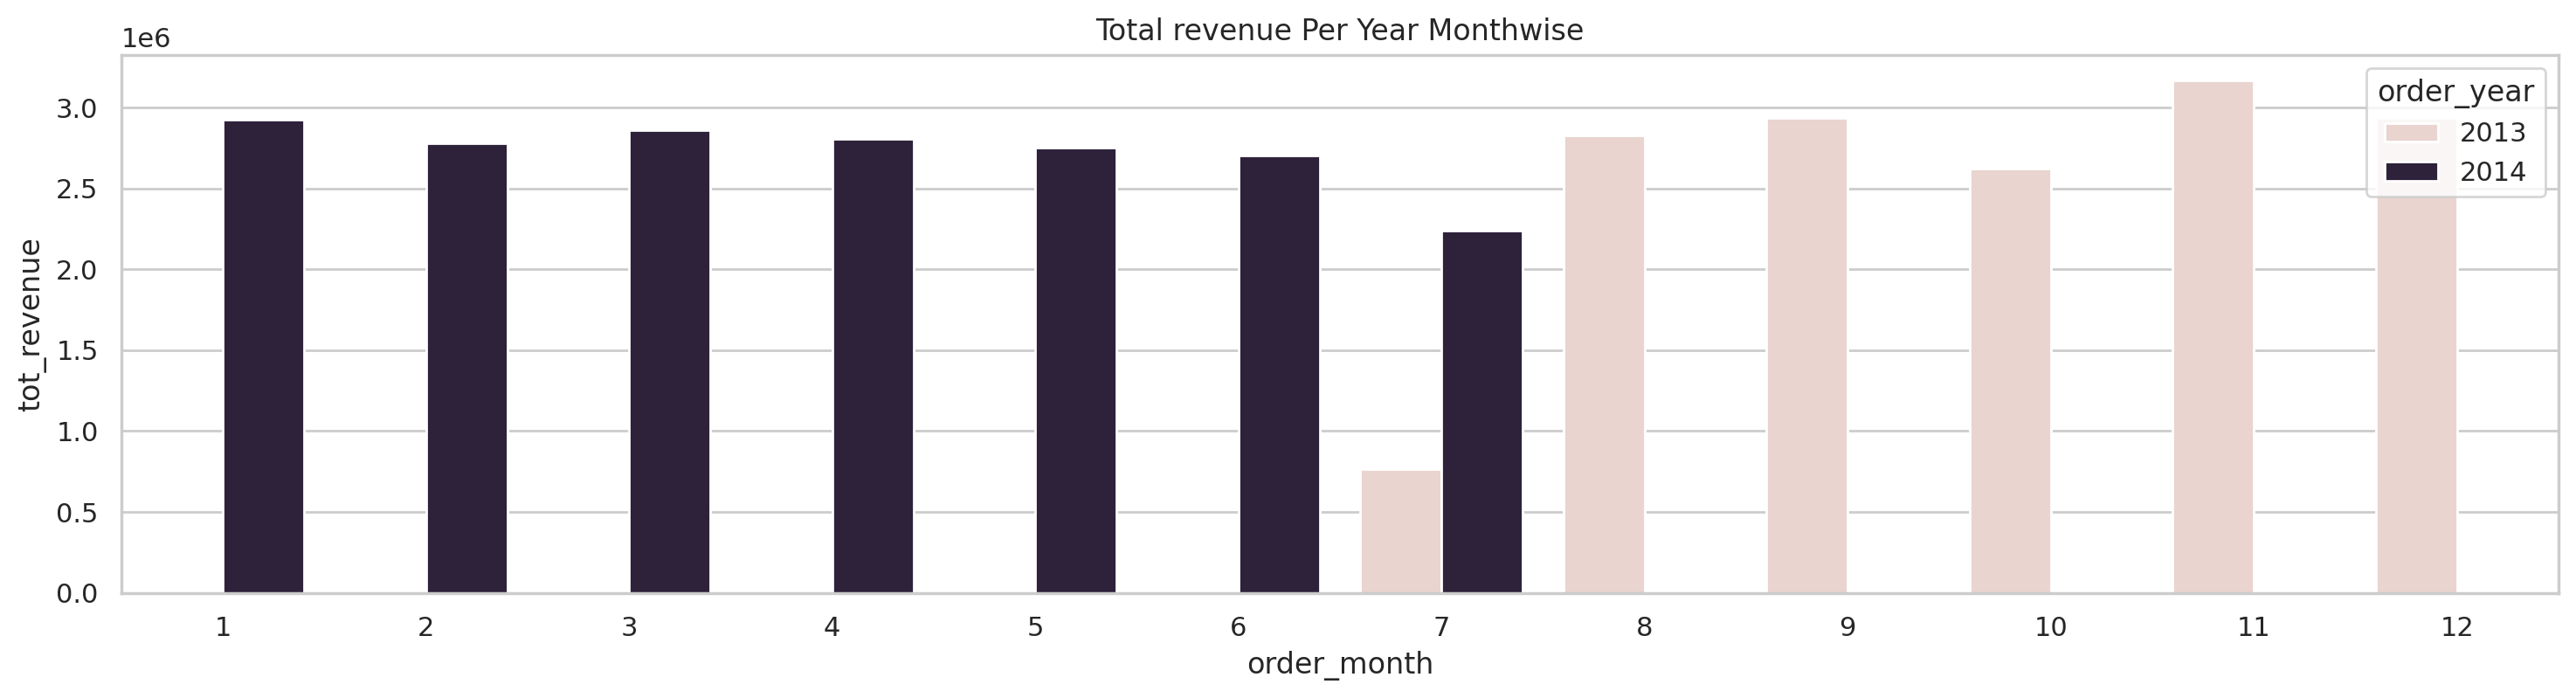

In [140]:
g=sns.barplot(x='order_month',y='tot_revenue',hue='order_year',data=pdf)
g.set_title('Total revenue Per Year Monthwise')

In [141]:
dept_df=(orders_df.filter((orders_df.order_status!="CANCELED")&(orders_df.order_status!="SUSPECTED_FRAUD"))
        .join(order_items_df,orders_df.order_id==order_items_df.order_item_order_id,how='inner')
        .join(products_df,order_items_df.order_item_product_id==products_df.product_id,how='inner')
        .join(categories_df,products_df.product_category_id==categories_df.category_id,how='inner')
        .join(departments_df,departments_df.department_id==categories_df.category_department_id,how='inner')
        .select('department_name',F.year(orders_df.order_date).alias("order_year"),'order_item_subtotal')
        .groupBy([departments_df.department_name, 'order_year'])
        .agg(F.sum(order_items_df.order_item_subtotal).alias("revenue_total"))
        .orderBy('department_name','revenue_total'))
dept_df.cache()

23/10/09 14:15:14 WARN CacheManager: Asked to cache already cached data.


DataFrame[department_name: string, order_year: int, revenue_total: double]

In [142]:
dept_df.show(10)

+---------------+----------+------------------+
|department_name|order_year|     revenue_total|
+---------------+----------+------------------+
|        Apparel|      2013|3090985.6535224915|
|        Apparel|      2014| 3917585.841217041|
|       Fan Shop|      2013| 7290831.879999161|
|       Fan Shop|      2014|  9095735.77280426|
|        Fitness|      2013|119526.58082199097|
|        Fitness|      2014| 150509.1409931183|
|       Footwear|      2013|1711492.5186824799|
|       Footwear|      2014| 2122339.649032593|
|           Golf|      2013| 1967396.959728241|
|           Golf|      2014|2440585.2815055847|
+---------------+----------+------------------+
only showing top 10 rows



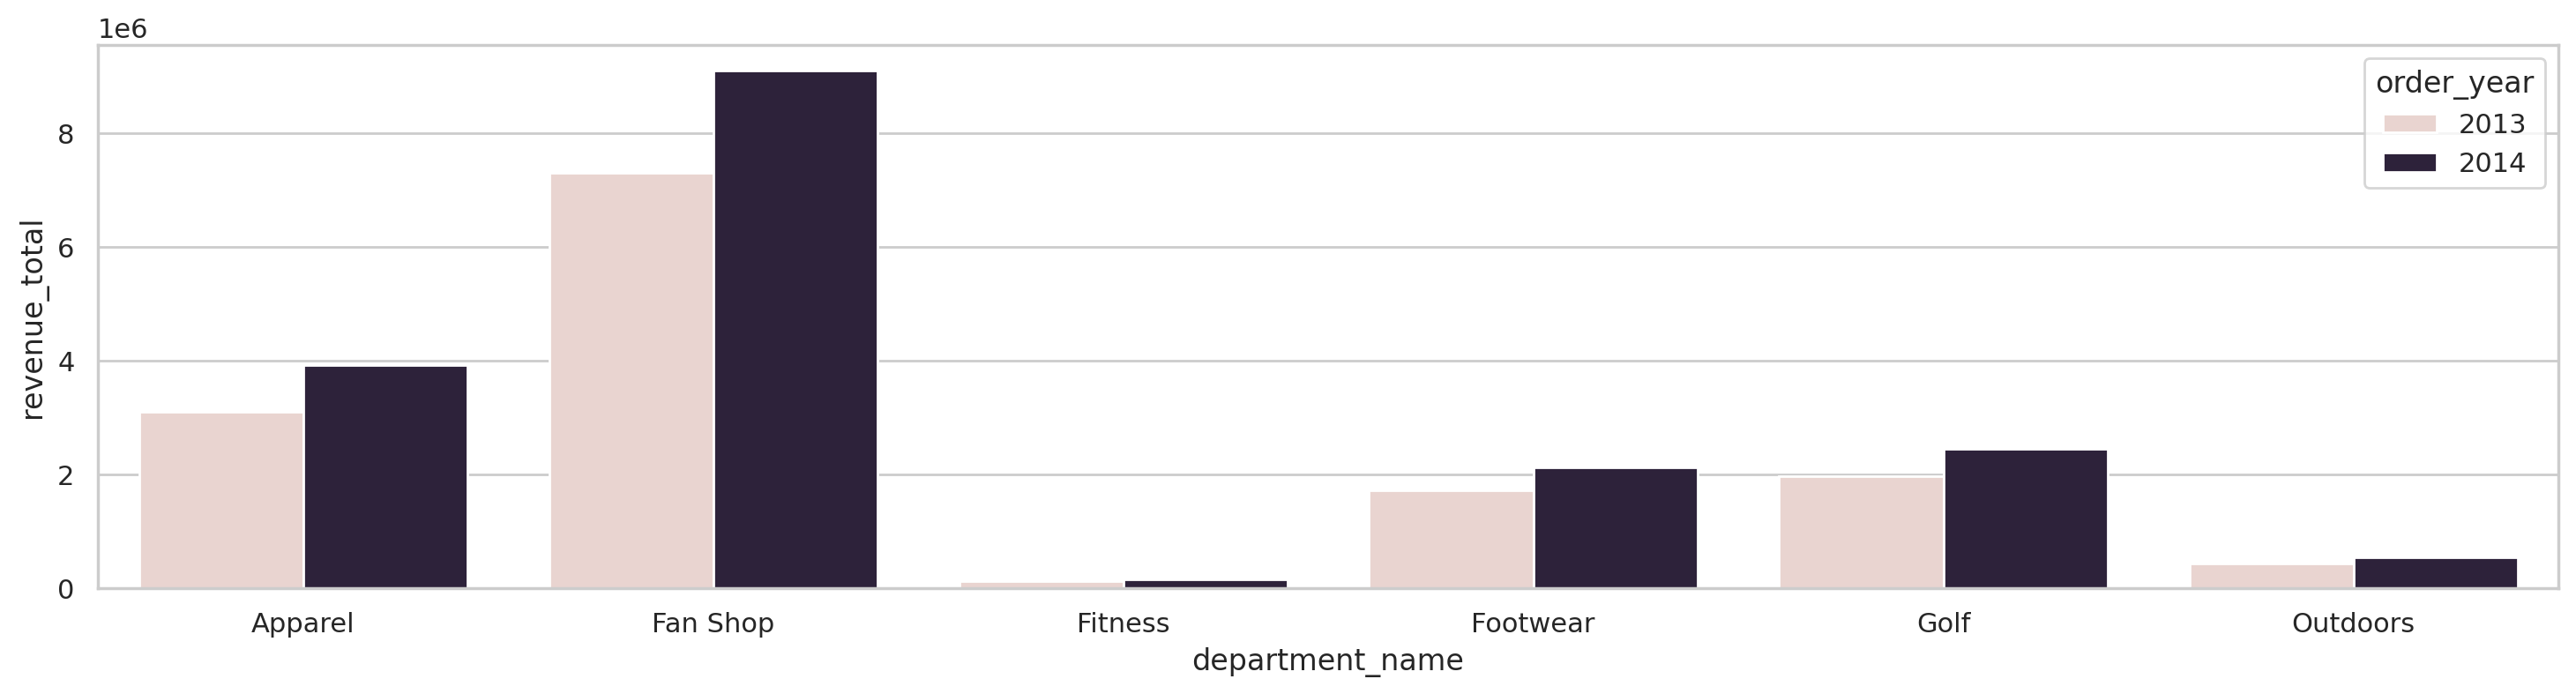

In [143]:
p_df=dept_df.toPandas()
g1=sns.barplot(x='department_name',y='revenue_total',hue='order_year',data=p_df)

In [144]:
pivoted_pdf=p_df.pivot(index='department_name',columns='order_year',values='revenue_total')
pivoted_pdf

order_year,2013,2014
department_name,,
Apparel,3.090986e+06,3.917586e+06
Fan Shop,7.290832e+06,9.095736e+06
Fitness,1.195266e+05,1.505091e+05
Footwear,1.711493e+06,2.122340e+06
Golf,1.967397e+06,2.440585e+06
Outdoors,4.203180e+05,5.324377e+05


<Axes: title={'center': 'Departments Performance'}, xlabel='department_name'>

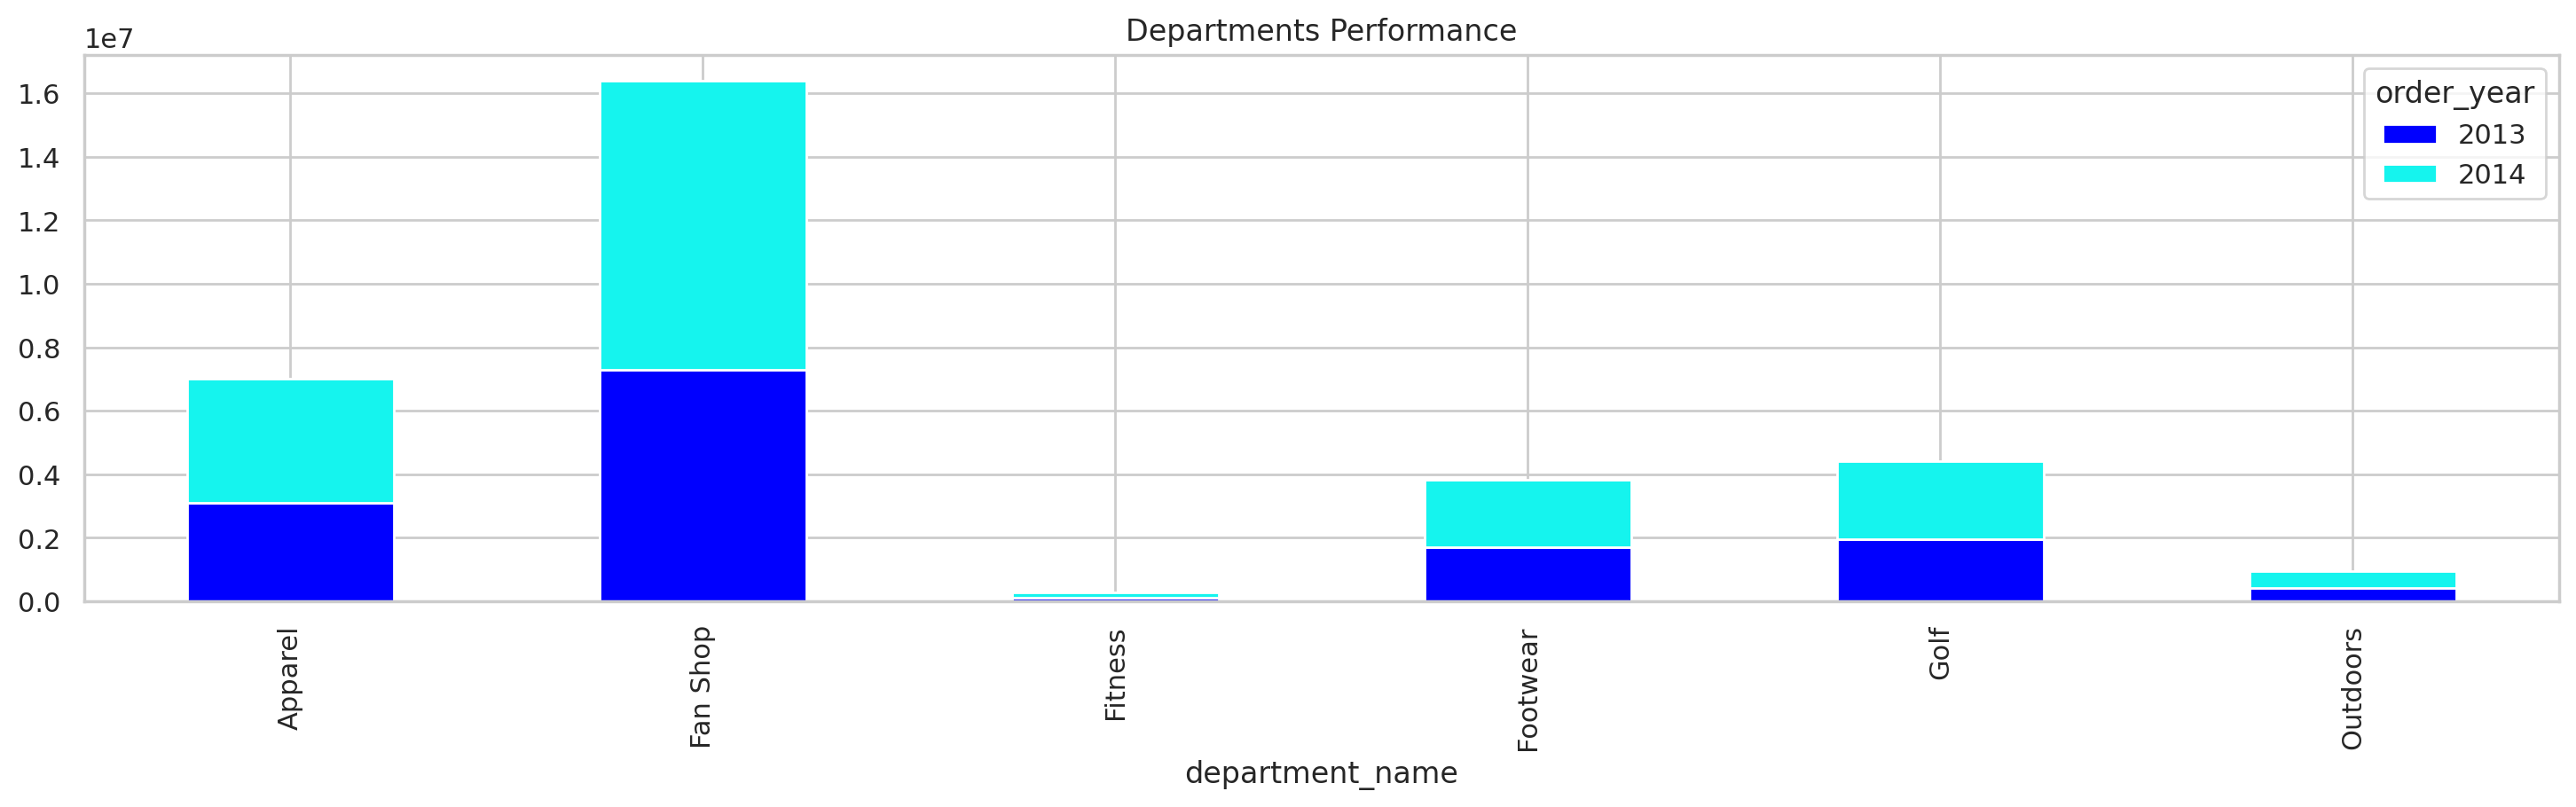

In [145]:
pivoted_pdf.plot.bar(stacked=True,title='Departments Performance',color=['Blue','#15f4ee'])

Getting product with max revenue

In [146]:
df1=(order_items_df
    .join(orders_df, order_items_df.order_item_order_id == orders_df.order_id, how='inner')
    .join(products_df, order_items_df.order_item_product_id == products_df.product_id, how='inner')
    .groupBy(F.year(orders_df.order_date).alias('order_year'),products_df.product_id,products_df.product_name)
    .agg(F.sum(order_items_df.order_item_subtotal).alias('Revenue of product'))
    .orderBy('Revenue of product', ascending=False))


In [147]:
df1.show(5)

+----------+----------+--------------------+------------------+
|order_year|product_id|        product_name|Revenue of product|
+----------+----------+--------------------+------------------+
|      2014|      1004|Field & Stream Sp...| 3853407.425842285|
|      2013|      1004|Field & Stream Sp...|3076246.2644958496|
|      2014|       365|Perfect Fitness P...|2478726.8793144226|
|      2014|       957|Diamondback Women...|2286147.6637268066|
|      2014|       191|Nike Men's Free 5...|2026197.3586273193|
+----------+----------+--------------------+------------------+
only showing top 5 rows



In [148]:
df11=df1.toPandas()
df12=df11.pivot(index='product_name',columns='order_year',values='Revenue of product')
df12

order_year,2013,2014
product_name,,
Bag Boy Beverage Holder,10195.919884,10920.629896
Bag Boy M330 Push Cart,6799.149910,9838.770020
Bowflex SelectTech 1090 Dumbbells,4199.929932,1799.969971
Bridgestone e6 Straight Distance NFL Carolina,14491.469894,15195.249893
Bridgestone e6 Straight Distance NFL San Dieg,12124.209929,16858.729895
...,...,...
adidas Kids' F5 Messi FG Soccer Cleat,11126.820251,16200.370293
adidas Men's F10 Messi TRX FG Soccer Cleat,24475.920704,31854.690941
adidas Men's Germany Black Crest Away Tee,9800.000000,11675.000000


<Axes: title={'center': 'Product Sales'}, xlabel='product_name'>

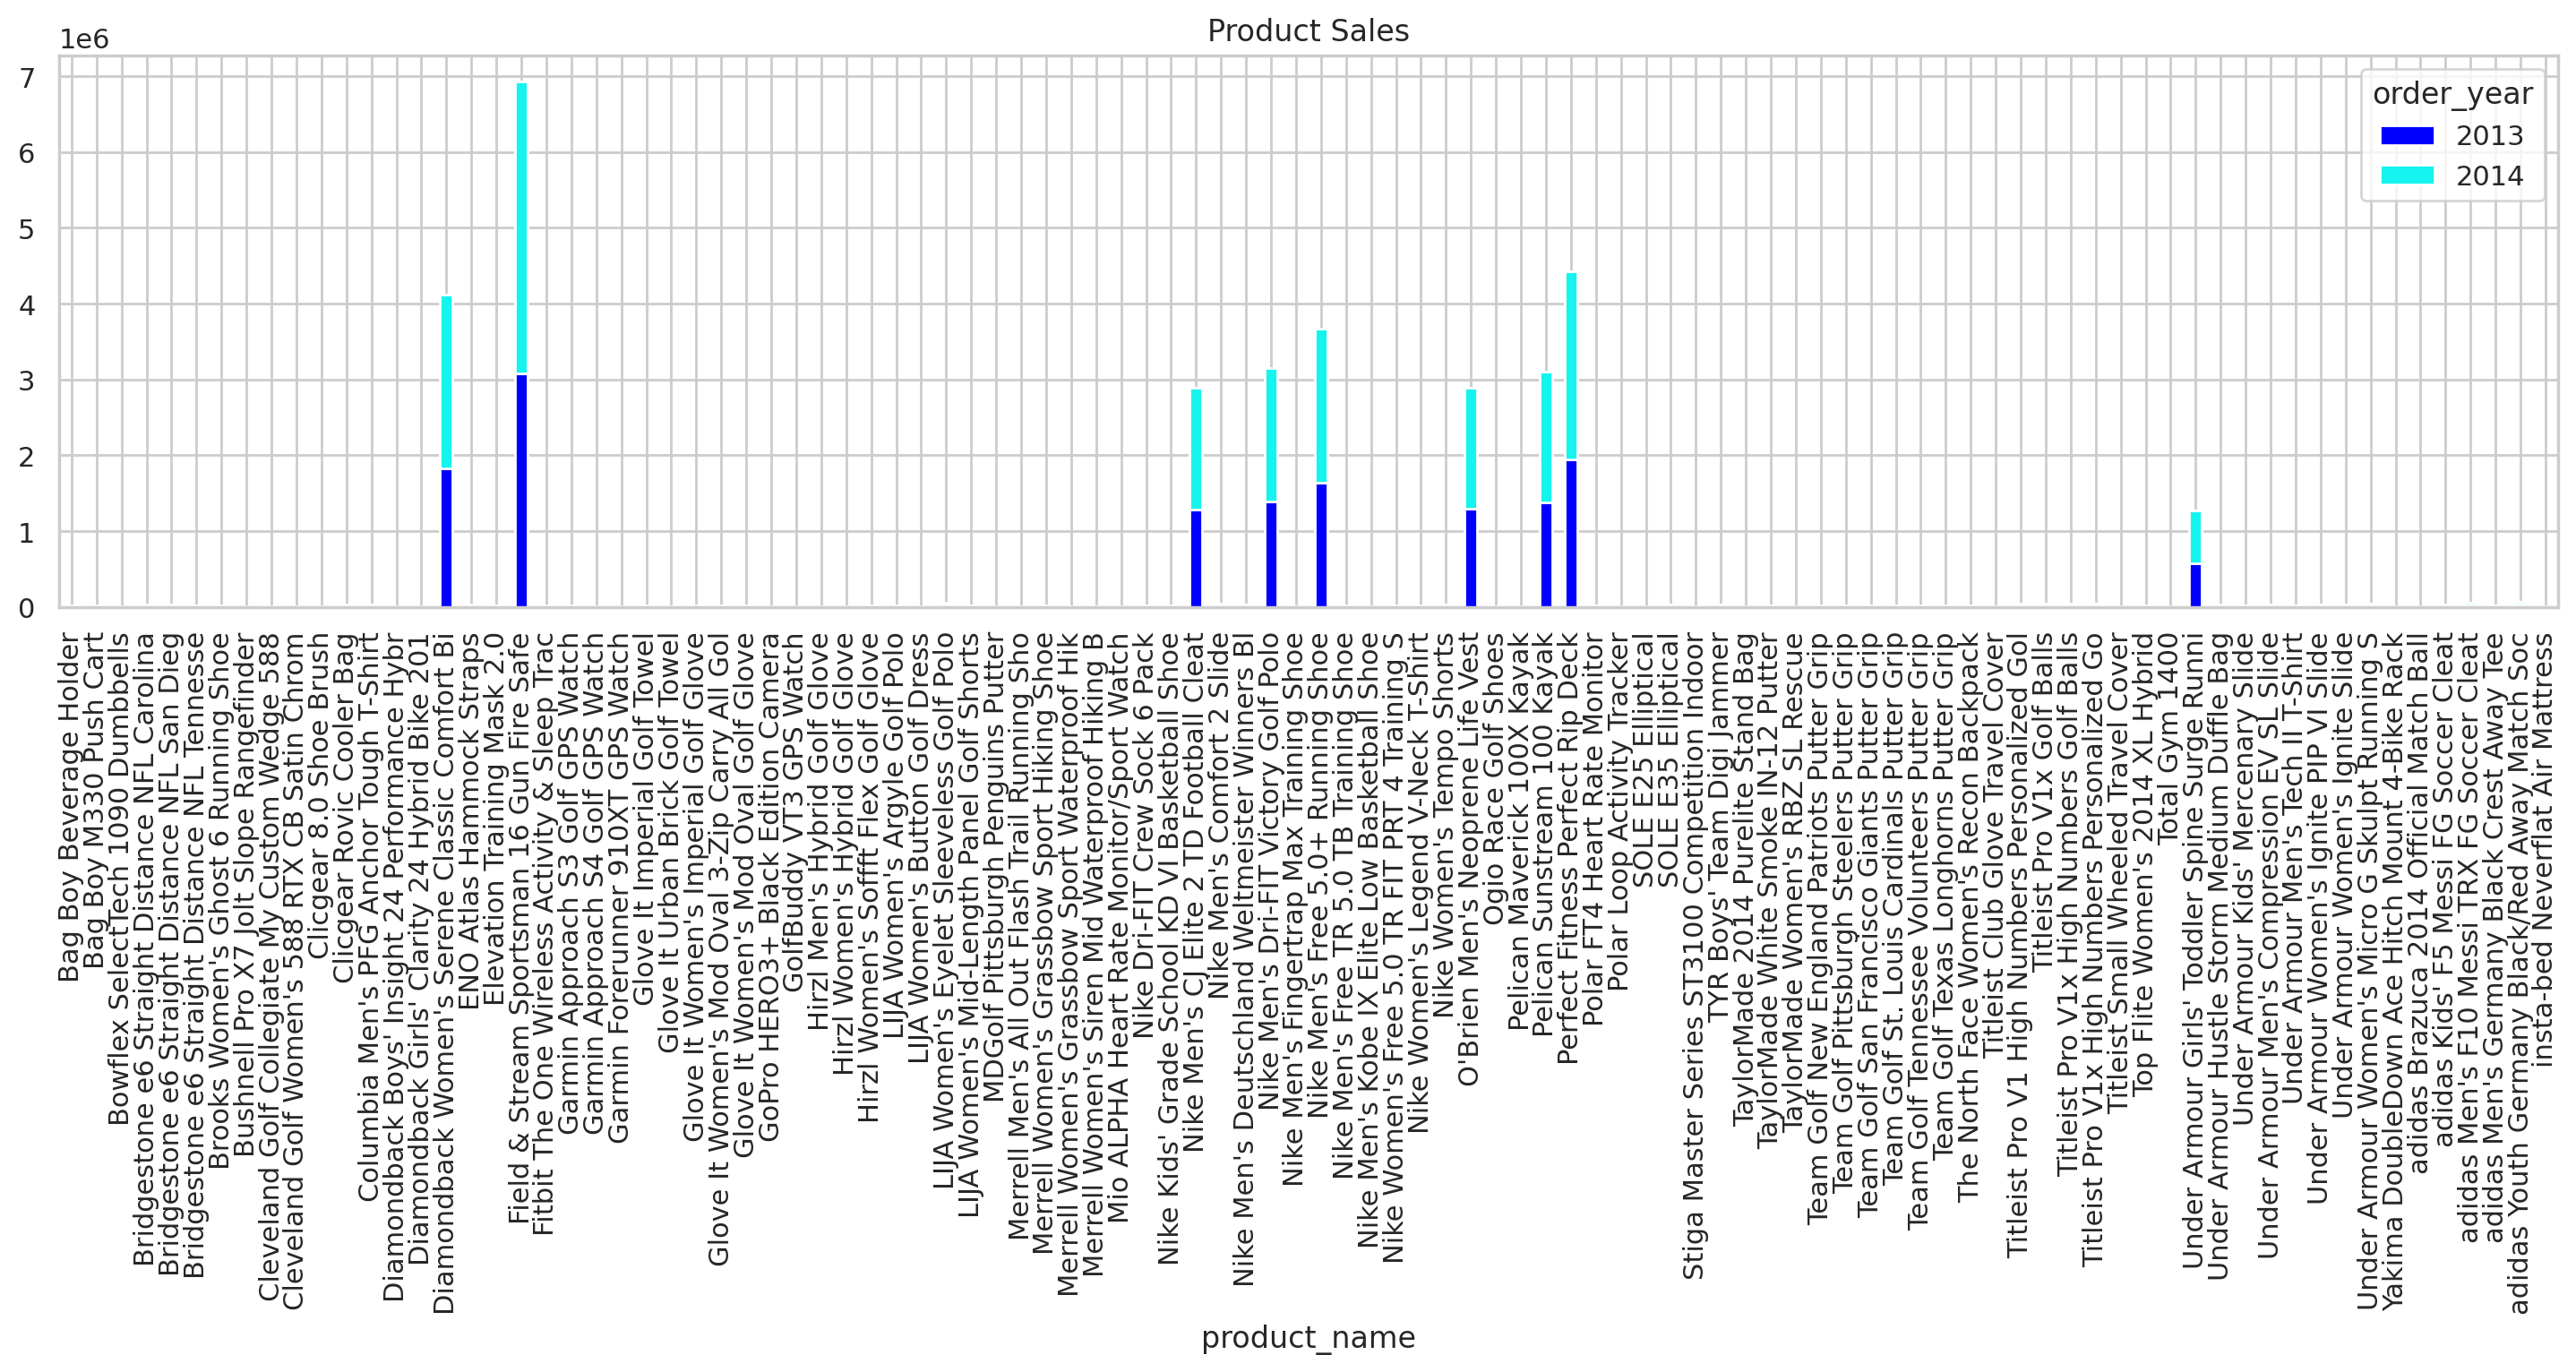

In [149]:
df12.plot.bar(stacked=True,title='Product Sales',color=['Blue','#15f4ee'])

# Window Functions


In [154]:
type(df11)

pandas.core.frame.DataFrame

In [155]:
sparkdf11=spark.createDataFrame(df11)

/home/rakhulks/.local/share/virtualenvs/pyspark-Vq-m6yr1/lib/python3.11/site-packages/pyspark/sql/pandas/conversion.py:485: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:


In [166]:
window1 = Window.orderBy(col("Revenue of product").desc())
sparkdf11.withColumn("rank",F.rank().over(window1)).show()

23/10/09 14:50:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/09 14:50:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/09 14:50:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+----------+--------------------+------------------+----+
|order_year|product_id|        product_name|Revenue of product|rank|
+----------+----------+--------------------+------------------+----+
|      2014|      1004|Field & Stream Sp...| 3853407.425842285|   1|
|      2013|      1004|Field & Stream Sp...|3076246.2644958496|   2|
|      2014|       365|Perfect Fitness P...|2478726.8793144226|   3|
|      2014|       957|Diamondback Women...|2286147.6637268066|   4|
|      2014|       191|Nike Men's Free 5...|2026197.3586273193|   5|
|      2013|       365|Perfect Fitness P...|1942416.2642097473|   6|
|      2013|       957|Diamondback Women...|1832277.9071044922|   7|
|      2014|       502|Nike Men's Dri-FI...|         1754800.0|   8|
|      2014|      1073|Pelican Sunstream...|1715314.2771148682|   9|
|      2013|       191|Nike Men's Free 5...|1641435.8380355835|  10|
|      2014|       403|Nike Men's CJ Eli...| 1611616.088104248|  11|
|      2014|      1014|O'Brien Men

In [181]:
sparkdf11.write.saveAsTable("productwise_revenue",format='parquet',mode='append')


In [193]:
spark.sql("select* from productwise_revenue order by `Revenue of product` desc").show()

+----------+----------+--------------------+------------------+
|order_year|product_id|        product_name|Revenue of product|
+----------+----------+--------------------+------------------+
|      2014|      1004|Field & Stream Sp...| 3853407.425842285|
|      2014|      1004|Field & Stream Sp...| 3853407.425842285|
|      2014|      1004|Field & Stream Sp...| 3853407.425842285|
|      2013|      1004|Field & Stream Sp...|3076246.2644958496|
|      2013|      1004|Field & Stream Sp...|3076246.2644958496|
|      2013|      1004|Field & Stream Sp...|3076246.2644958496|
|      2014|       365|Perfect Fitness P...|2478726.8793144226|
|      2014|       365|Perfect Fitness P...|2478726.8793144226|
|      2014|       365|Perfect Fitness P...|2478726.8793144226|
|      2014|       957|Diamondback Women...|2286147.6637268066|
|      2014|       957|Diamondback Women...|2286147.6637268066|
|      2014|       957|Diamondback Women...|2286147.6637268066|
|      2014|       191|Nike Men's Free 5